In [1]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

series = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv", index_col=[0], parse_dates=True,
                     squeeze=True)
series.head()

C:\Users\Priyanka\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales of shampoo over a three year period, dtype: float64

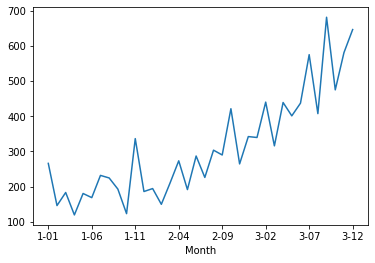

In [2]:
series.plot()
pyplot.show()

From here we can see that Shampoo sales data has a clear trend, that means time series is not stationary and will require differencing to make it stationary.

In [3]:
X = series.values
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9,
         nan])

In [4]:
size = int(len(X) * 0.60)
print(len(X))
print(size)


37
22


In [5]:
train, test = X[0:size], X[size:len(X)-1]

In [6]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=290.313769, expected=264.500000
predicted=349.117724, expected=342.300000
predicted=306.513044, expected=339.700000
predicted=387.376403, expected=440.400000
predicted=348.154199, expected=315.900000
predicted=386.308847, expected=439.300000
predicted=356.082118, expected=401.300000
predicted=446.379483, expected=437.400000
predicted=394.737306, expected=575.500000
predicted=434.915549, expected=407.600000
predicted=507.923488, expected=682.000000
predicted=435.482867, expected=475.300000
predicted=652.743772, expected=581.300000
predicted=546.343419, expected=646.900000
Test MSE: 6508.897


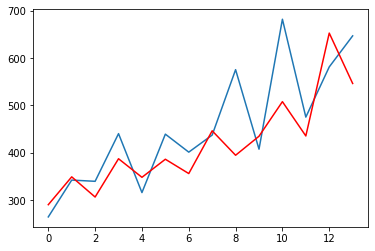

In [7]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

<img src="time-series-trend.png">